In [11]:
import functions as fxn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
columns = ['INSTNM', 'HIGHDEG', 'CONTROL', 'REGION', 'LOCALE', 'LO_INC_DEBT_N', 'MD_INC_DEBT_N', 'HI_INC_DEBT_N',
           'LOAN_EVER', 'PELL_EVER', 'PCTPELL', 'ICLEVEL', 'CURROPER', 'TUITFTE', 'CDR3', 'INEXPFTE']
sheets = fxn.read_in_CollegeScorecard(columns)
full_df = fxn.concatenate_all_sheets(sheets)
full_df_nonan = fxn.quick_clean(full_df, columns=['PCTPELL', 'CDR3'])

In [3]:
filled_full_df_nonan = fxn.back_fill_from_year(full_df_nonan, 2017)

In [4]:
filled_full_df_nonan['Public_or_Private'] = filled_full_df_nonan.CONTROL.map({2:0, 1:1, 3:1})
filled_full_df_nonans = fxn.quick_clean(filled_full_df_nonan, columns=['CDR3', 'HI_INC_DEBT_N', 'Public_or_Private'])
filled_full_df_nonans.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30730 entries, (0, 2011-01-01 00:00:00) to (6735, 2016-01-01 00:00:00)
Data columns (total 18 columns):
INSTNM               30730 non-null object
HIGHDEG              30730 non-null int64
REGION               30730 non-null float64
TUITFTE              30672 non-null float64
INEXPFTE             30673 non-null float64
PCTPELL              30730 non-null float64
CDR3                 30730 non-null float64
LO_INC_DEBT_N        30688 non-null object
MD_INC_DEBT_N        30688 non-null object
HI_INC_DEBT_N        30730 non-null object
LOAN_EVER            28944 non-null object
PELL_EVER            30531 non-null object
ICLEVEL              30730 non-null float64
YEAR                 30730 non-null datetime64[ns]
LOCALE               0 non-null float64
CURROPER             0 non-null float64
CONTROL              30730 non-null float64
Public_or_Private    30730 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(2), object(6)
memory

In [27]:
logreg = fxn.create_logistic_regression(filled_full_df_nonans, ['CDR3', 'HI_INC_DEBT_N'], 'Public_or_Private')
score = logreg.score(filled_full_df_nonans[['CDR3', 'HI_INC_DEBT_N']], filled_full_df_nonans['Public_or_Private'])

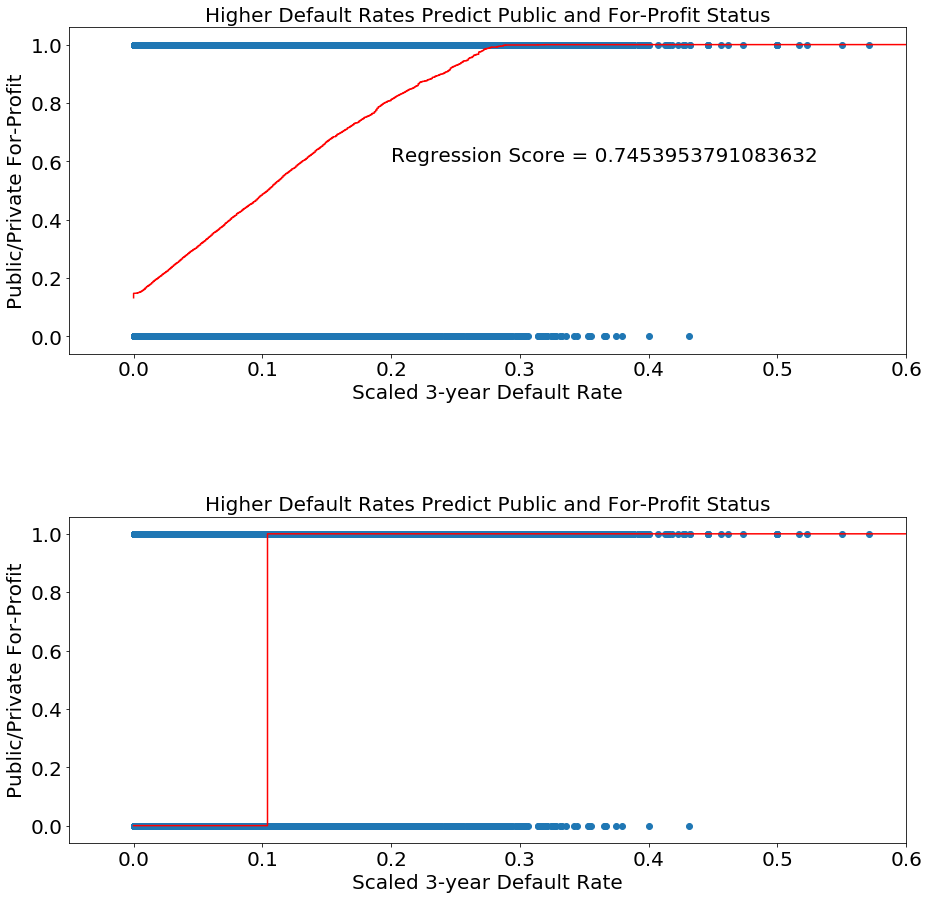

<Figure size 432x288 with 0 Axes>

In [33]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(211)
plt.scatter('CDR3', 'Public_or_Private', data=filled_full_df_nonans)
# plt.plot(df.CDR3.sort_values(), df.Predicted_Public_or_Private.sort_values(), c='r')
plt.plot(filled_full_df_nonans.CDR3.sort_values(), filled_full_df_nonans.ProbCorrect_Predicted_Public_or_Private.sort_values(), c='r')
plt.xlabel('Scaled 3-year Default Rate', fontsize=20)
plt.ylabel('Public/Private For-Profit', fontsize=20)
plt.title('Higher Default Rates Predict Public and For-Profit Status', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(0.2, 0.6,  f'Regression Score = {score}', fontsize=20)
plt.xlim(-0.05,0.6)

ax2 = fig.add_subplot(212)
plt.scatter('CDR3', 'Public_or_Private', data=filled_full_df_nonans)
plt.plot(filled_full_df_nonans.CDR3.sort_values(), filled_full_df_nonans.Predicted_Public_or_Private.sort_values(), c='r')
plt.xlabel('Scaled 3-year Default Rate', fontsize=20)
plt.ylabel('Public/Private For-Profit', fontsize=20)
plt.title('Higher Default Rates Predict Public and For-Profit Status', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-0.05,0.6)

plt.subplots_adjust(hspace=0.5)
plt.show()

plt.savefig('LogisticRegression')